# Football player Dataset Cleaning and Preparing

This dataset has been downloaded from  Kaggle https://www.kaggle.com/karangadiya/fifa19. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
INPUT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/RedesNeuronales/datasets/Fifa/FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/RedesNeuronales/datasets/Fifa/FootballPlayerPreparedCleanAttributes.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/RedesNeuronales/datasets/Fifa/FootballPlayerOneHotEncodedClasses.csv"

In [3]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**First step:** Remove unnecesary columns

In [5]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'Flag'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Potential':'Real Face'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Jersey Number':'RB'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'GKDiving':'Release Clause'].columns, inplace=True, axis = 1)

Then, we remove the goal keepers.

In [6]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)

In [7]:
dataset[:10]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,91,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,91,RCM,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,91,RS,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,91,RCB,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,90,ST,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,90,LCM,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [8]:
dataset[-10:]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
18196,47,CM,31.0,28.0,40.0,53.0,31.0,46.0,39.0,37.0,...,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0
18197,47,CM,44.0,44.0,36.0,53.0,43.0,50.0,48.0,46.0,...,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0
18199,47,CM,31.0,31.0,41.0,51.0,26.0,46.0,35.0,31.0,...,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0
18200,47,ST,28.0,47.0,47.0,42.0,37.0,39.0,32.0,25.0,...,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0
18201,47,RB,22.0,23.0,45.0,25.0,27.0,21.0,21.0,27.0,...,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0
18202,47,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,47,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,47,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,47,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0
18206,46,CM,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,...,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0


**Second Step:** find out whether or not there are missing values and remove the least influential attributes. 

In [9]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Overall': 0,
 'Position': 60,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping': 48,
 'Stamina': 48,
 'Strength': 48,
 'LongShots': 48,
 'Aggression': 48,
 'Interceptions': 48,
 'Positioning': 48,
 'Vision': 48,
 'Penalties': 48,
 'Composure': 48,
 'Marking': 48,
 'StandingTackle': 48,
 'SlidingTackle': 48}

Since we have enough data, we remove all rows with missing values in any attribute

In [10]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Overall': 0,
 'Position': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0}

In [11]:
dataset.shape

(16122, 31)

The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [12]:
dataset.corr()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Overall,1.000000,0.496603,0.373079,0.466908,0.722720,0.452090,0.516363,0.503054,0.455875,0.585104,...,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365
Crossing,0.496603,1.000000,0.413404,-0.134959,0.632386,0.472485,0.712261,0.714762,0.618580,0.592781,...,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,0.373079,0.413404,1.000000,0.002099,0.398895,0.814663,0.706635,0.614189,0.537508,0.218965,...,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841
HeadingAccuracy,0.466908,-0.134959,0.002099,1.000000,0.131909,0.062357,-0.134535,-0.091652,-0.076517,0.057267,...,0.029784,0.458631,0.286880,-0.024105,-0.079291,0.108405,0.344770,0.274280,0.257420,0.234933
ShortPassing,0.722720,0.632386,0.398895,0.131909,1.000000,0.469096,0.638983,0.614810,0.584412,0.842294,...,0.575126,0.305331,0.287053,0.501792,0.724511,0.384587,0.673243,0.244696,0.235083,0.203009
Volleys,0.452090,0.472485,0.814663,0.062357,0.469096,1.000000,0.674461,0.691624,0.618031,0.313951,...,0.786780,-0.064275,-0.334536,0.745740,0.659091,0.730061,0.504112,-0.357150,-0.402222,-0.430056
Dribbling,0.516363,0.712261,0.706635,-0.134535,0.638983,0.674461,1.000000,0.731726,0.599424,0.494533,...,0.724191,-0.059600,-0.190316,0.788939,0.758829,0.565716,0.509143,-0.214481,-0.244737,-0.258046
Curve,0.503054,0.714762,0.614189,-0.091652,0.614810,0.691624,0.731726,1.000000,0.788928,0.539851,...,0.730734,0.035402,-0.068820,0.673975,0.727416,0.593532,0.540471,-0.108242,-0.128246,-0.147523
FKAccuracy,0.455875,0.618580,0.537508,-0.076517,0.584412,0.618031,0.599424,0.788928,1.000000,0.554455,...,0.695764,0.075132,0.001575,0.562075,0.683214,0.589946,0.498877,-0.048092,-0.056328,-0.081250
LongPassing,0.585104,0.592781,0.218965,0.057267,0.842294,0.313951,0.494533,0.539851,0.554455,1.000000,...,0.461247,0.348801,0.425595,0.325664,0.651983,0.238135,0.577808,0.369965,0.384637,0.360727


In [13]:
dataset[:10]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,91,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,91,RCM,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,91,RS,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,91,RCB,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,90,ST,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,90,LCM,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


We remove "Position" and those attributes with a correlation value less than 0.4, assuming that they do not excessively influence the overall value. 

In [14]:
dataset.drop(['Position'], inplace=True, axis = 1)
dataset.drop(['Finishing'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['Strength'], inplace=True, axis = 1)
dataset.drop(['Interceptions'], inplace=True, axis = 1)
dataset.drop(['Penalties'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Marking':'SlidingTackle'].columns, inplace=True, axis = 1)

In [15]:
dataset.shape

(16122, 18)

**Third Step:** shuffle the dataset (three times).

In [16]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Overall,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,76,75.0,59.0,72.0,27.0,75.0,72.0,52.0,64.0,73.0,72.0,79.0,88.0,66.0,82.0,64.0,70.0,74.0
1,79,71.0,61.0,68.0,60.0,86.0,68.0,73.0,66.0,80.0,75.0,68.0,91.0,70.0,63.0,70.0,76.0,75.0
2,60,38.0,56.0,47.0,48.0,50.0,45.0,32.0,35.0,57.0,62.0,59.0,55.0,55.0,32.0,63.0,45.0,50.0
3,68,58.0,77.0,56.0,61.0,59.0,62.0,45.0,54.0,66.0,57.0,69.0,72.0,53.0,65.0,62.0,48.0,51.0
4,73,67.0,77.0,70.0,66.0,65.0,68.0,70.0,42.0,68.0,69.0,76.0,73.0,72.0,58.0,74.0,69.0,68.0


**Fourth step:** The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [17]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [18]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Overall,Quality,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,76,3,75.0,59.0,72.0,27.0,75.0,72.0,52.0,64.0,73.0,72.0,79.0,88.0,66.0,82.0,64.0,70.0,74.0
1,79,3,71.0,61.0,68.0,60.0,86.0,68.0,73.0,66.0,80.0,75.0,68.0,91.0,70.0,63.0,70.0,76.0,75.0
2,60,0,38.0,56.0,47.0,48.0,50.0,45.0,32.0,35.0,57.0,62.0,59.0,55.0,55.0,32.0,63.0,45.0,50.0
3,68,2,58.0,77.0,56.0,61.0,59.0,62.0,45.0,54.0,66.0,57.0,69.0,72.0,53.0,65.0,62.0,48.0,51.0
4,73,3,67.0,77.0,70.0,66.0,65.0,68.0,70.0,42.0,68.0,69.0,76.0,73.0,72.0,58.0,74.0,69.0,68.0
5,69,2,28.0,73.0,56.0,24.0,46.0,30.0,26.0,32.0,53.0,66.0,32.0,82.0,21.0,61.0,28.0,30.0,57.0
6,71,2,65.0,60.0,62.0,48.0,77.0,56.0,42.0,50.0,74.0,68.0,70.0,69.0,52.0,54.0,74.0,65.0,73.0
7,59,0,49.0,59.0,68.0,41.0,58.0,43.0,42.0,63.0,59.0,57.0,52.0,68.0,35.0,57.0,29.0,60.0,48.0
8,62,0,58.0,59.0,64.0,35.0,57.0,43.0,39.0,54.0,66.0,58.0,46.0,67.0,41.0,61.0,40.0,41.0,46.0
9,56,0,51.0,43.0,52.0,31.0,52.0,33.0,31.0,45.0,52.0,52.0,24.0,59.0,29.0,42.0,47.0,38.0,53.0


Calculating the *Overall* intervals for each label.

In [19]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [20]:
dataset["Quality"].value_counts()

2    4353
0    4296
1    3868
3    3605
Name: Quality, dtype: int64

In [21]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [22]:
dataset.drop(columns="Overall", inplace=True)
dataset[:10]

,Quality,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,3,75.0,59.0,72.0,27.0,75.0,72.0,52.0,64.0,73.0,72.0,79.0,88.0,66.0,82.0,64.0,70.0,74.0
1,3,71.0,61.0,68.0,60.0,86.0,68.0,73.0,66.0,80.0,75.0,68.0,91.0,70.0,63.0,70.0,76.0,75.0
2,0,38.0,56.0,47.0,48.0,50.0,45.0,32.0,35.0,57.0,62.0,59.0,55.0,55.0,32.0,63.0,45.0,50.0
3,2,58.0,77.0,56.0,61.0,59.0,62.0,45.0,54.0,66.0,57.0,69.0,72.0,53.0,65.0,62.0,48.0,51.0
4,3,67.0,77.0,70.0,66.0,65.0,68.0,70.0,42.0,68.0,69.0,76.0,73.0,72.0,58.0,74.0,69.0,68.0
5,2,28.0,73.0,56.0,24.0,46.0,30.0,26.0,32.0,53.0,66.0,32.0,82.0,21.0,61.0,28.0,30.0,57.0
6,2,65.0,60.0,62.0,48.0,77.0,56.0,42.0,50.0,74.0,68.0,70.0,69.0,52.0,54.0,74.0,65.0,73.0
7,0,49.0,59.0,68.0,41.0,58.0,43.0,42.0,63.0,59.0,57.0,52.0,68.0,35.0,57.0,29.0,60.0,48.0
8,0,58.0,59.0,64.0,35.0,57.0,43.0,39.0,54.0,66.0,58.0,46.0,67.0,41.0,61.0,40.0,41.0,46.0
9,0,51.0,43.0,52.0,31.0,52.0,33.0,31.0,45.0,52.0,52.0,24.0,59.0,29.0,42.0,47.0,38.0,53.0


**Fifth Step:** split the dataset vertically into attributes $x$ and label $t$ for supervised learning.

In [23]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,3
1,3
2,0
3,2
4,3
5,2
6,2
7,0
8,0
9,0


In [24]:
x = dataset.drop (columns="Quality")
x.head()

,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,75.0,59.0,72.0,27.0,75.0,72.0,52.0,64.0,73.0,72.0,79.0,88.0,66.0,82.0,64.0,70.0,74.0
1,71.0,61.0,68.0,60.0,86.0,68.0,73.0,66.0,80.0,75.0,68.0,91.0,70.0,63.0,70.0,76.0,75.0
2,38.0,56.0,47.0,48.0,50.0,45.0,32.0,35.0,57.0,62.0,59.0,55.0,55.0,32.0,63.0,45.0,50.0
3,58.0,77.0,56.0,61.0,59.0,62.0,45.0,54.0,66.0,57.0,69.0,72.0,53.0,65.0,62.0,48.0,51.0
4,67.0,77.0,70.0,66.0,65.0,68.0,70.0,42.0,68.0,69.0,76.0,73.0,72.0,58.0,74.0,69.0,68.0


**Sixth Step:** one-hot encoding of labels (target values).

In [25]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [26]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


**Seventh Step:** Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [27]:
x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
#x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,0.560976,0.113924,0.424658,-0.575,0.469880,0.469880,0.000000,0.216216,0.352113,0.360000,0.604938,0.768116,0.325301,0.682927,0.261905,0.414634,0.405405
1,0.463415,0.164557,0.315068,0.250,0.734940,0.373494,0.500000,0.270270,0.549296,0.440000,0.333333,0.855072,0.421687,0.219512,0.404762,0.560976,0.432432
2,-0.341463,0.037975,-0.260274,-0.050,-0.132530,-0.180723,-0.476190,-0.567568,-0.098592,0.093333,0.111111,-0.188406,0.060241,-0.536585,0.238095,-0.195122,-0.243243
3,0.146341,0.569620,-0.013699,0.275,0.084337,0.228916,-0.166667,-0.054054,0.154930,-0.040000,0.358025,0.304348,0.012048,0.268293,0.214286,-0.121951,-0.216216
4,0.365854,0.569620,0.369863,0.400,0.228916,0.373494,0.428571,-0.378378,0.211268,0.280000,0.530864,0.333333,0.469880,0.097561,0.500000,0.390244,0.243243
5,-0.585366,0.468354,-0.013699,-0.650,-0.228916,-0.542169,-0.619048,-0.648649,-0.211268,0.200000,-0.555556,0.594203,-0.759036,0.170732,-0.595238,-0.560976,-0.054054
6,0.317073,0.139241,0.150685,-0.050,0.518072,0.084337,-0.238095,-0.162162,0.380282,0.253333,0.382716,0.217391,-0.012048,0.000000,0.500000,0.292683,0.378378
7,-0.073171,0.113924,0.315068,-0.225,0.060241,-0.228916,-0.238095,0.189189,-0.042254,-0.040000,-0.061728,0.188406,-0.421687,0.073171,-0.571429,0.170732,-0.297297
8,0.146341,0.113924,0.205479,-0.375,0.036145,-0.228916,-0.309524,-0.054054,0.154930,-0.013333,-0.209877,0.159420,-0.277108,0.170732,-0.309524,-0.292683,-0.351351
9,-0.024390,-0.291139,-0.123288,-0.475,-0.084337,-0.469880,-0.500000,-0.297297,-0.239437,-0.173333,-0.753086,-0.072464,-0.566265,-0.292683,-0.142857,-0.365854,-0.162162


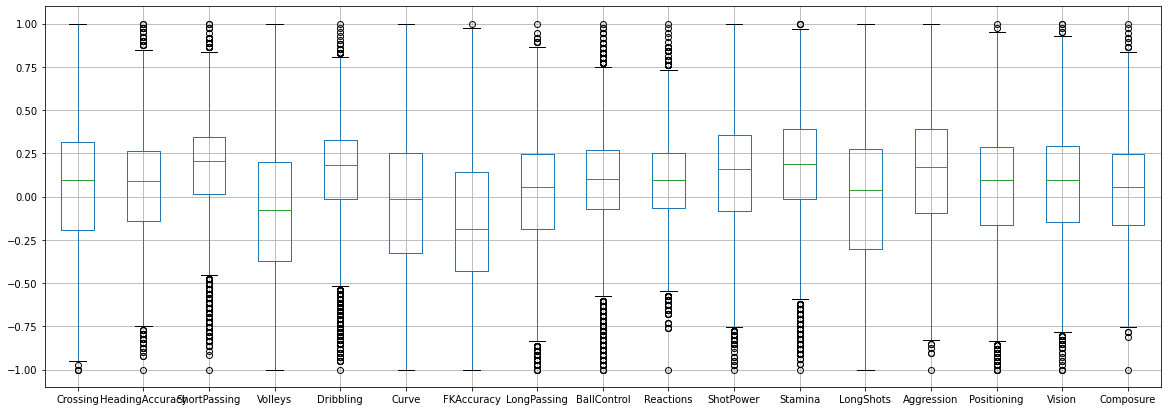

In [28]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

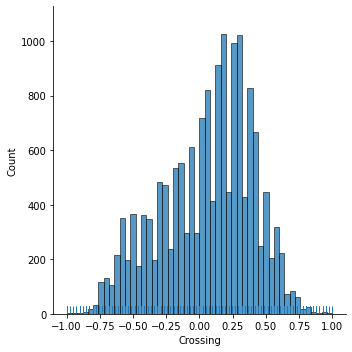

In [29]:
sns.displot(x["Crossing"],kde=False,rug=True)

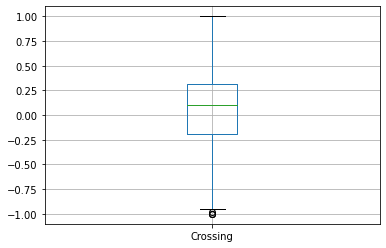

In [30]:
x.boxplot(column=["Crossing"])

In [31]:
x.describe()

,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,0.053537,0.064942,0.168294,-0.081373,0.122654,-0.030012,-0.132537,0.002751,0.076091,0.098800,0.125965,0.169170,-0.025506,0.136145,0.043417,0.060219,0.036497
std,0.344606,0.293820,0.268085,0.369549,0.301492,0.364944,0.358826,0.334822,0.282066,0.233806,0.326638,0.324097,0.379027,0.352347,0.349409,0.314939,0.274291
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.195122,-0.139241,0.013699,-0.375000,-0.012048,-0.325301,-0.428571,-0.189189,-0.070423,-0.066667,-0.086420,-0.014493,-0.301205,-0.097561,-0.166667,-0.146341,-0.162162
50%,0.097561,0.088608,0.205479,-0.075000,0.180723,-0.012048,-0.190476,0.054054,0.098592,0.093333,0.160494,0.188406,0.036145,0.170732,0.095238,0.097561,0.054054
75%,0.317073,0.265823,0.342466,0.200000,0.325301,0.253012,0.142857,0.243243,0.267606,0.253333,0.358025,0.391304,0.277108,0.390244,0.285714,0.292683,0.243243
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [32]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)